In [4]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [5]:
#create normally distributed data with same standard deviation
mu_a = 3
sigma_a=4
data_a = np.random.normal(loc=mu_a, scale=sigma_a, size=1000)
#create data b 
mu_b = 5
sigma_b = 4
data_b = np.random.normal(loc=mu_b, scale=sigma_b, size=1000)


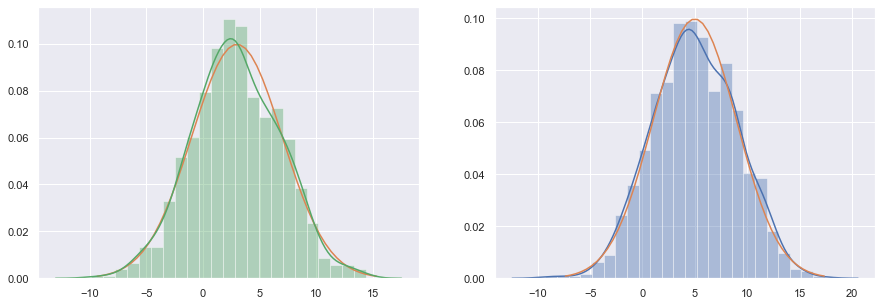

In [6]:
#Visualization
fig, ax = plt.subplots(1, 2, figsize=[15,5])
sns.distplot(data_b, ax=ax[1])
range_a = np.linspace(stats.norm.ppf(0.001, mu_a, sigma_a), stats.norm.ppf(0.999, mu_a, sigma_a))
range_b = np.linspace(stats.norm.ppf(0.001, mu_b, sigma_b), stats.norm.ppf(0.999, mu_b, sigma_b))
ax[1].plot(range_b, stats.norm.pdf(range_b, loc=mu_b, scale=sigma_b))
ax[0].plot(range_a, stats.norm.pdf(range_a, loc=mu_a, scale=sigma_a), color='C1')
sns.distplot(data_a, ax=ax[0], color='C2' )


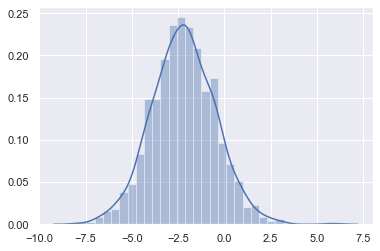

In [7]:
l_means = []
for _ in (range(1000)):
    smp_a = np.random.choice(data_a, 10)
    smp_b = np.random.choice(data_b, 10)
    l_means.append(smp_a.mean() - smp_b.mean())
lmeans = np.array(l_means)
sns.distplot(lmeans)

## Test of equality of two means
Two *independent samples* from two *normal distributions* with *equal variances*:
$$\sigma_X^2 = \sigma_Y^2 = \sigma$$
then:
$$T=\frac{(\bar{X}-\bar{Y})-(\mu_X - \mu_Y)}{S_p\sqrt{\frac{1}{n}+\frac{1}{m}}}$$

# ANOVA

### One way ANOVA
Comparing 2 means of independent unrelated groups 

In [43]:
# defining 3 groups with different means:

# group size
size = 100

mu_a = 5
sigma_a=4
group_a = np.random.normal(loc=mu_a, scale=sigma_a, size=size)

mu_b = 4
sigma_b=4
group_b = np.random.normal(loc=mu_b, scale=sigma_b, size=size)
mu_c = 4.5
sigma_c=4

group_c = np.random.normal(loc=mu_c, scale=sigma_c, size=size)

groups = [group_a, group_b, group_c]

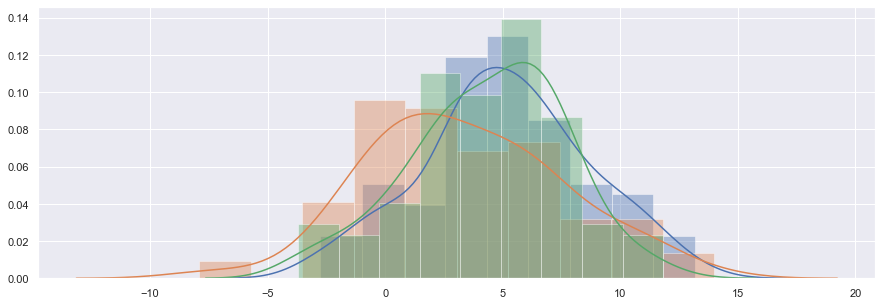

In [44]:
#Visualization
fig, ax = plt.subplots(1, 1, figsize=[15,5])
for i, group in enumerate(groups, 1):
    sns.distplot(group)


In [46]:
# scipy.stats:
stats.f_oneway(group_a, group_b, group_c)

F_onewayResult(statistic=5.63470489555496, pvalue=0.003964274608520181)

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

